In [28]:
# ensuring TensorFlow is properly installed and running locally
import tensorflow as tf
import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

DIRECTORY_PATH = 'cifar-10-batches-py'

DIRECTORY_LABELS = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

2.20.0


In [ ]:
# extract compressed data tar.gz
def load_cifar_batch(filename):
    with open(filename, 'rb') as file:
        data_dict = pickle.load(file, encoding='bytes')
        images = data_dict[b'data']
        labels = data_dict[b'labels']
    return images, labels

def load_all_batches(directory_path):
    images = []
    labels = []
    
    # Load all data batches
    for i in range(1, 6):
        batch_file = os.path.join(directory_path, f'data_batch_{i}')
        batch_images, batch_labels = load_cifar_batch(batch_file)
        
        images.append(batch_images)
        labels.extend(batch_labels)
    
    # Combine images and labels
    images = np.concatenate(images)
    labels = np.array(labels)
    
    return images, labels

train_images, train_labels = load_all_batches(DIRECTORY_PATH)

# Convert to DataFrame
train_data = pd.DataFrame({'image': list(train_images), 'label': train_labels})

In [12]:
# Load the test batch
test_batch_file = os.path.join(DIRECTORY_PATH, 'test_batch')
test_images, test_labels = load_cifar_batch(test_batch_file)

# Convert to DataFrame
test_data = pd.DataFrame({
    'Image': list(test_images),
    'Label': test_labels
})

In [13]:
print(train_data.head())
print(test_data.head())

                                               image  label
0  [59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...      6
1  [154, 126, 105, 102, 125, 155, 172, 180, 142, ...      9
2  [255, 253, 253, 253, 253, 253, 253, 253, 253, ...      9
3  [28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...      4
4  [170, 168, 177, 183, 181, 177, 181, 184, 189, ...      1
                                               Image  Label
0  [158, 159, 165, 166, 160, 156, 162, 159, 158, ...      3
1  [235, 231, 232, 232, 232, 232, 232, 232, 232, ...      8
2  [158, 158, 139, 132, 166, 182, 187, 193, 199, ...      8
3  [155, 167, 176, 190, 177, 166, 168, 166, 170, ...      0
4  [65, 70, 48, 30, 23, 40, 44, 45, 45, 40, 10, 1...      6


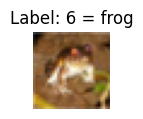

In [ ]:
# Example to reshape one image
first_image_flat = train_data['image'][0]
first_image = np.array(first_image_flat).reshape(3, 32, 32).transpose(1, 2, 0)

# Set a smaller figure size, I cant seeeeee please zoom out!
plt.figure(figsize=(1, 1))  
plt.imshow(first_image)
plt.title(f'Label: {train_data['label'][0]} = {DIRECTORY_LABELS[train_data['label'][0]]}')
plt.axis('off')  # Optional: turn off axis
plt.show()

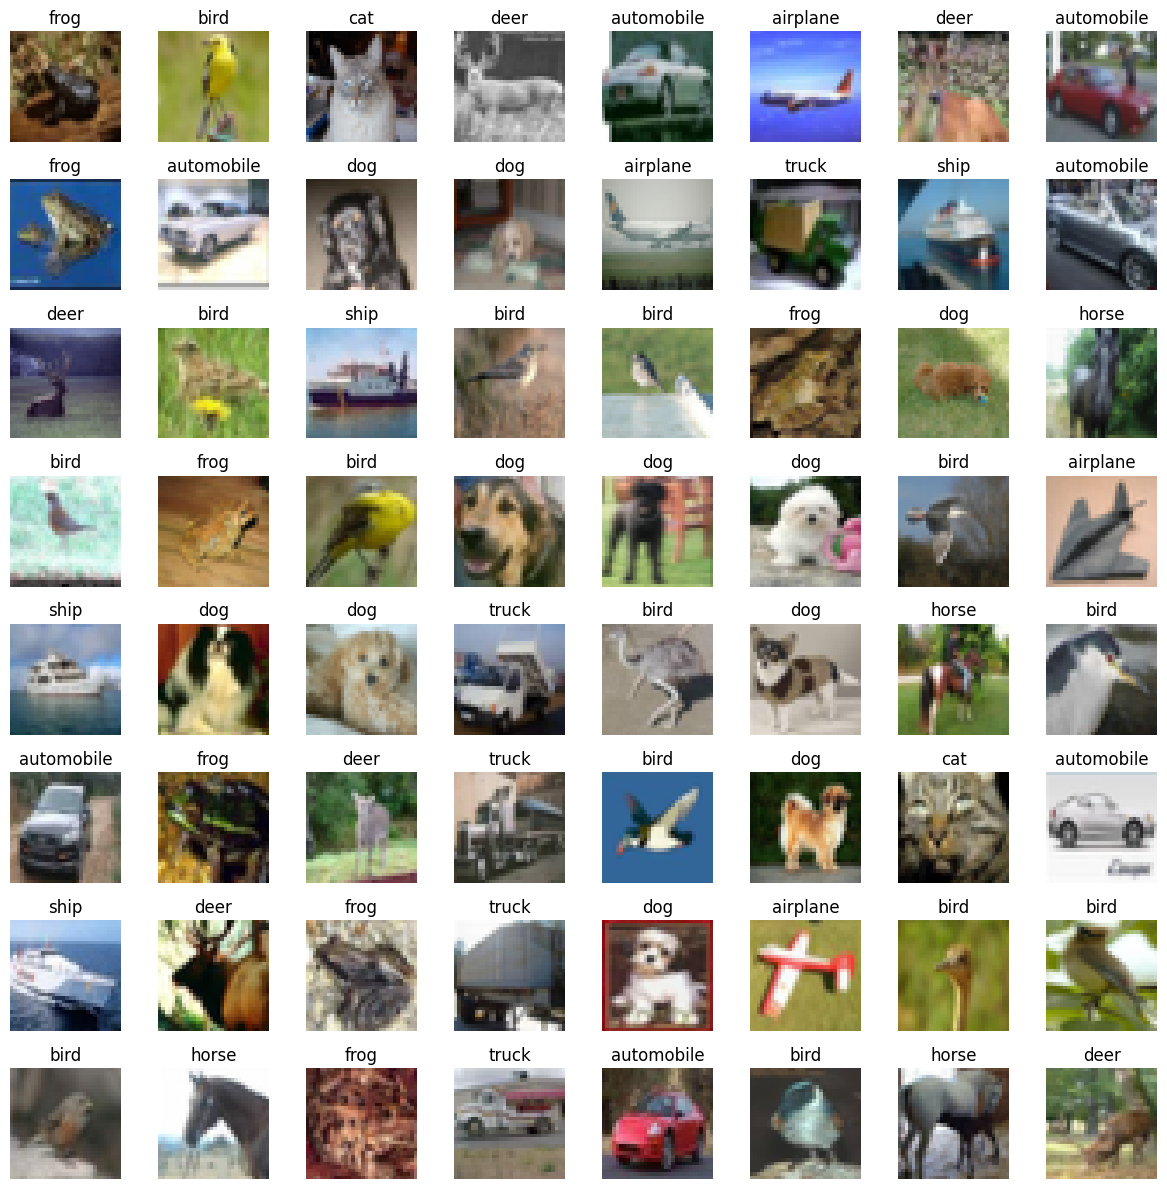

In [27]:
# Select 64 random indices from the dataset
random_indices = np.random.choice(train_data.index, size=64, replace=False)

# Set the size of the grid
plt.figure(figsize=(12, 12))

# Loop through the selected indices
for i, index in enumerate(random_indices):
    # Get the image and label
    image_flat = train_data.loc[index, 'image']
    label_number = train_data.loc[index, 'label']
    class_name = DIRECTORY_LABELS[label_number]

    # Reshape the image
    image = np.array(image_flat).reshape(3, 32, 32).transpose(1, 2, 0)

    # Plot the image on a grid
    plt.subplot(8, 8, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()